In [2]:
import pandas as pd 
import numpy as np
import datetime as dt

In [3]:
df = pd.read_csv('nft_sales.csv')

/var/folders/n_/9x9xfmx15851j2yn0svm5m100000gp/T/ipykernel_57243/927059549.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('nft_sales.csv')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108147 entries, 0 to 108146
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              108147 non-null  int64  
 1   collection_slug         108147 non-null  object 
 2   collection_name         108147 non-null  object 
 3   collection_url          108147 non-null  object 
 4   asset_id                108147 non-null  int64  
 5   asset_name              107776 non-null  object 
 6   asset_description       101491 non-null  object 
 7   asset_contract_date     108147 non-null  object 
 8   asset_url               108147 non-null  object 
 9   asset_img_url           107986 non-null  object 
 10  event_id                108147 non-null  int64  
 11  event_time              108147 non-null  object 
 12  event_auction_type      70980 non-null   object 
 13  event_contract_address  108132 non-null  object 
 14  event_quantity      

In [5]:
df.head(5)

,Unnamed: 0,collection_slug,collection_name,collection_url,asset_id,asset_name,asset_description,asset_contract_date,asset_url,asset_img_url,event_id,event_time,event_auction_type,event_contract_address,event_quantity,event_payment_symbol,event_total_price
0,0,rarible,Rarible,https://opensea.io/collection/rarible,18214580,Daft Punk Never Die,"Piece of art, Daft Punk, always in our hears.\...",2020-05-27T16:53:32.834583,https://opensea.io/assets/0xd07dc4262bcdbf8519...,https://lh3.googleusercontent.com/DRaz3AD6SNrC...,80762268,2021-02-27T23:59:19.806617,dutch,0xcd4ec7b66fbc029c116ba9ffb3e59351c20b5b06,1,ETH,0.070000
1,1,rarebit-bunnies,Rarebit Bunnies,https://opensea.io/collection/rarebit-bunnies,18276844,Rarebit #164 - Wax Off Bunny,🐇♥️ When it comes to high kicks this Rarebit's...,2021-01-21T20:43:08.113711,https://opensea.io/assets/0x61bd6b10c7bf3e548f...,https://lh3.googleusercontent.com/zI7j5Gc8jcJ_...,80762142,2021-02-27T23:58:48.806004,dutch,0xcd4ec7b66fbc029c116ba9ffb3e59351c20b5b06,1,ETH,0.150000
2,2,rarible,Rarible,https://opensea.io/collection/rarible,16911700,Meditation,Meditation by Diana.\n\nMinted only 20 NFT col...,2020-05-27T16:53:32.834583,https://opensea.io/assets/0xd07dc4262bcdbf8519...,https://lh3.googleusercontent.com/VxNjqW9b0yKv...,80762131,2021-02-27T23:58:46.805355,dutch,0xcd4ec7b66fbc029c116ba9ffb3e59351c20b5b06,1,ETH,0.001000
3,3,rarible,Rarible,https://opensea.io/collection/rarible,16986936,I´m OG,This is one of the first NFTs in human history,2020-05-27T16:53:32.834583,https://opensea.io/assets/0xd07dc4262bcdbf8519...,https://lh3.googleusercontent.com/lwLuEUsHn2bd...,80762121,2021-02-27T23:58:45.675259,dutch,0xcd4ec7b66fbc029c116ba9ffb3e59351c20b5b06,1,ETH,0.000647
4,4,chainguardians,ChainGuardians,https://opensea.io/collection/chainguardians,13382164,Celia B100 #105,One of the original androids created within th...,2019-11-17T21:00:18.404059,https://opensea.io/assets/0x4fe99deb8f0be517c3...,https://lh3.googleusercontent.com/ODEhFsO_E_O8...,80762099,2021-02-27T23:58:43.700969,NaN,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,1,ETH,0.200000


## Data Processing/Cleaning

In [6]:
print('Event date ranged from: {} ~ {}'.format(df['event_time'].min(),df['event_time'].max()))

Event date ranged from: 2021-02-01T00:04:46.812958 ~ 2021-02-28T23:59:28.801365


In [7]:
df['event_time'] = pd.to_datetime(df['event_time'])

In [8]:
df['event_dt'] = df['event_time'].dt.date # use for daily aggregate, also join it with the price table later

In [9]:
df['event_hr'] = df['event_time'].dt.strftime('%H') # see if there is hour of the day effect

In [10]:
print('Asset contract created from: {} ~ {}'.format(df['asset_contract_date'].min(),df['asset_contract_date'].max()))

Asset contract created from: 2018-01-23T04:51:38.832339 ~ 2021-02-27T21:20:22.393421


In [11]:
df['asset_contract_date'] = pd.to_datetime(df['asset_contract_date']).dt.date #no need for timestamp when the nft is created

In [12]:
df['event_quantity'].unique()

array([1, 6, 5, 20, 2, 3, 10, 4, 100, 7, 50, 13, 30, 23, 25, 28, 29, 8,
       15, 16, 1000, 42, 48, 18, 1000000000000000000, 3648, 19, 9, 12, 14,
       250, 26, 11, 2000000000000000000, 10000000000000000000, 38669, 62,
       5000000000000000000, 131, 230, 24, 31, 258, 22, 33, 72, 35, 257,
       82, 255, 17, 439, 241, 21, 67, 500, 425, 27, 293, 54, 110, 64, 34,
       484, 5000, 270, 10000, 280, 40, 10980, 1245, 90, 167, 125, 69, 60,
       100000000000000000, 94, 200, 44, 55, 75, 235, 4000000000000000000,
       105, 43, 120, 1020, 795, 51, 134, 61, 148, 163, 170, 175, 155, 186,
       786, 195, 3490, 41, 952, 1405, 38, 165, 190, 113, 400, 150, 81,
       420, 97, 428, 115, 135, 109, 63, 296, 20000000000, 185, 1005, 300,
       3000000000000000000, 292, 1000000000000, '1', '2', '4', '5', '3',
       '12', '18', '26', '8', '9', '10', '100', '1000000000000000000',
       '11', '10000', '7', '45', '20', '19', '21', '17', '38', '15', '6',
       '22', '8000000000000', '14', '23', '16',

Need to eliminate outliers here (algo, wash trading, exploits and etc.) Anything over 1000 is highly unorganic.

In [13]:
df['event_quantity'] = df['event_quantity'].apply(lambda x: float(x))
df = df[df['event_quantity'] < 1000] #filter out outliers

In [14]:
df['event_payment_symbol'].unique()

array(['ETH', 'WETH', 'SAND', 'MANA', 'USDC', 'RARI', 'NUGS', 'GALA',
       'DAI', 'BONDLY', 'PGU', 'WCK', 'MEME', nan, 'MGDv2', 'CUBE',
       'TRSH', 'ENJ', 'ABST', 'REVV', 'DENA', 'SMTS', 'ART', 'BAT',
       'KLTR', 'GR1M', 'ELAND', 'ECAT', 'FUD', 'BONES', 'MORK', 'WHALE',
       'SURF', 'ARCONA', 'DHC', 'UNI', 'ATRI', 'YUMI', 'ROPE', 'FTM',
       'VI', 'PPDEX', '0xBTC', 'CRED', 'HUE', 'WIPC', 'ASLT', 'GUSD',
       'MBC', 'SKULL', 'KAP', 'NDR'], dtype=object)

## Adding Price Data

In [15]:
asset_list = df['event_payment_symbol'].unique().tolist()

In [16]:
import yfinance as yf

def get_asset_data(asset_list, start_date, end_date):
    # Create an empty DataFrame to store the data
    df = pd.DataFrame(columns=['Asset', 'Date', 'Close'])
    
    for asset in asset_list:
        # Download data for the current asset
        asset_data = yf.download(f'{asset}-USD', start_date, end_date)
        
        # Iterate over the rows of the asset_data DataFrame
        for index, row in asset_data.iterrows():
            date = index.date()  # Extract the date from the index
            
            # Append the row of data to the DataFrame
            df = df.append({'Asset': asset, 'Date': date, 'Close': row['Close']}, ignore_index=True)
    
    return df

# Assuming you have the asset_list and start/end dates already defined
start_date = dt.datetime(2021, 2, 1)
end_date = dt.datetime(2021, 2, 28)

# Call the function with the asset_list and desired date range
asset_data_df = get_asset_data(asset_list, start_date, end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


/var/folders/n_/9x9xfmx15851j2yn0svm5m100000gp/T/ipykernel_57243/1639414003.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Asset': asset, 'Date': date, 'Close': row['Close']}, ignore_index=True)
/var/folders/n_/9x9xfmx15851j2yn0svm5m100000gp/T/ipykernel_57243/1639414003.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Asset': asset, 'Date': date, 'Close': row['Close']}, ignore_index=True)
/var/folders/n_/9x9xfmx15851j2yn0svm5m100000gp/T/ipykernel_57243/1639414003.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Asset': asset, 'Date': date, 'Close': row['Close']}, ignore_index=True)
/var/folders/n_/9x9xfmx15851j2yn0svm5m100000gp/T/ipykernel_57243/1639414003.py:

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


/var/folders/n_/9x9xfmx15851j2yn0svm5m100000gp/T/ipykernel_57243/1639414003.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Asset': asset, 'Date': date, 'Close': row['Close']}, ignore_index=True)
/var/folders/n_/9x9xfmx15851j2yn0svm5m100000gp/T/ipykernel_57243/1639414003.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Asset': asset, 'Date': date, 'Close': row['Close']}, ignore_index=True)
/var/folders/n_/9x9xfmx15851j2yn0svm5m100000gp/T/ipykernel_57243/1639414003.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Asset': asset, 'Date': date, 'Close': row['Close']}, ignore_index=True)
/var/folders/n_/9x9xfmx15851j2yn0svm5m100000gp/T/ipykernel_57243/1639414003.py:

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- NUGS-USD: No timezone found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


/var/folders/n_/9x9xfmx15851j2yn0svm5m100000gp/T/ipykernel_57243/1639414003.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Asset': asset, 'Date': date, 'Close': row['Close']}, ignore_index=True)
/var/folders/n_/9x9xfmx15851j2yn0svm5m100000gp/T/ipykernel_57243/1639414003.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Asset': asset, 'Date': date, 'Close': row['Close']}, ignore_index=True)
/var/folders/n_/9x9xfmx15851j2yn0svm5m100000gp/T/ipykernel_57243/1639414003.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Asset': asset, 'Date': date, 'Close': row['Close']}, ignore_index=True)
/var/folders/n_/9x9xfmx15851j2yn0svm5m100000gp/T/ipykernel_57243/1639414003.py:

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- PGU-USD: No timezone found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed


/var/folders/n_/9x9xfmx15851j2yn0svm5m100000gp/T/ipykernel_57243/1639414003.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Asset': asset, 'Date': date, 'Close': row['Close']}, ignore_index=True)
/var/folders/n_/9x9xfmx15851j2yn0svm5m100000gp/T/ipykernel_57243/1639414003.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Asset': asset, 'Date': date, 'Close': row['Close']}, ignore_index=True)
/var/folders/n_/9x9xfmx15851j2yn0svm5m100000gp/T/ipykernel_57243/1639414003.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Asset': asset, 'Date': date, 'Close': row['Close']}, ignore_index=True)
/var/folders/n_/9x9xfmx15851j2yn0svm5m100000gp/T/ipykernel_57243/1639414003.py:

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- MGDV2-USD: No timezone found, symbol may be delisted


/var/folders/n_/9x9xfmx15851j2yn0svm5m100000gp/T/ipykernel_57243/1639414003.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Asset': asset, 'Date': date, 'Close': row['Close']}, ignore_index=True)
/var/folders/n_/9x9xfmx15851j2yn0svm5m100000gp/T/ipykernel_57243/1639414003.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Asset': asset, 'Date': date, 'Close': row['Close']}, ignore_index=True)
/var/folders/n_/9x9xfmx15851j2yn0svm5m100000gp/T/ipykernel_57243/1639414003.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Asset': asset, 'Date': date, 'Close': row['Close']}, ignore_index=True)
/var/folders/n_/9x9xfmx15851j2yn0svm5m100000gp/T/ipykernel_57243/1639414003.py:

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- CUBE-USD: Data doesn't exist for startDate = 1612137600, endDate = 1614470400
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- TRSH-USD: No timezone found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


/var/folders/n_/9x9xfmx15851j2yn0svm5m100000gp/T/ipykernel_57243/1639414003.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Asset': asset, 'Date': date, 'Close': row['Close']}, ignore_index=True)
/var/folders/n_/9x9xfmx15851j2yn0svm5m100000gp/T/ipykernel_57243/1639414003.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Asset': asset, 'Date': date, 'Close': row['Close']}, ignore_index=True)
/var/folders/n_/9x9xfmx15851j2yn0svm5m100000gp/T/ipykernel_57243/1639414003.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Asset': asset, 'Date': date, 'Close': row['Close']}, ignore_index=True)
/var/folders/n_/9x9xfmx15851j2yn0svm5m100000gp/T/ipykernel_57243/1639414003.py:

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- DENA-USD: Data doesn't exist for startDate = 1612137600, endDate = 1614470400
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- SMTS-USD: No timezone found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- KLTR-USD: No timezone found, symbol may be delisted


/var/folders/n_/9x9xfmx15851j2yn0svm5m100000gp/T/ipykernel_57243/1639414003.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Asset': asset, 'Date': date, 'Close': row['Close']}, ignore_index=True)
/var/folders/n_/9x9xfmx15851j2yn0svm5m100000gp/T/ipykernel_57243/1639414003.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Asset': asset, 'Date': date, 'Close': row['Close']}, ignore_index=True)
/var/folders/n_/9x9xfmx15851j2yn0svm5m100000gp/T/ipykernel_57243/1639414003.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Asset': asset, 'Date': date, 'Close': row['Close']}, ignore_index=True)
/var/folders/n_/9x9xfmx15851j2yn0svm5m100000gp/T/ipykernel_57243/1639414003.py:

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- GR1M-USD: No timezone found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ELAND-USD: Data doesn't exist for startDate = 1612137600, endDate = 1614470400
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ECAT-USD: No timezone found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- FUD-USD: Data doesn't exist for startDate = 1612137600, endDate = 1614470400
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- BONES-USD: Data doesn't exist for startDate = 1612137600, endDate = 1614470400
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- MORK-USD: Data doesn't exist for startDate = 1612137600, endDate = 1614470400
[*********************100%***********

/var/folders/n_/9x9xfmx15851j2yn0svm5m100000gp/T/ipykernel_57243/1639414003.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Asset': asset, 'Date': date, 'Close': row['Close']}, ignore_index=True)
/var/folders/n_/9x9xfmx15851j2yn0svm5m100000gp/T/ipykernel_57243/1639414003.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Asset': asset, 'Date': date, 'Close': row['Close']}, ignore_index=True)
/var/folders/n_/9x9xfmx15851j2yn0svm5m100000gp/T/ipykernel_57243/1639414003.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Asset': asset, 'Date': date, 'Close': row['Close']}, ignore_index=True)
/var/folders/n_/9x9xfmx15851j2yn0svm5m100000gp/T/ipykernel_57243/1639414003.py:

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- DHC-USD: No timezone found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- YUMI-USD: No timezone found, symbol may be delisted


/var/folders/n_/9x9xfmx15851j2yn0svm5m100000gp/T/ipykernel_57243/1639414003.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Asset': asset, 'Date': date, 'Close': row['Close']}, ignore_index=True)
/var/folders/n_/9x9xfmx15851j2yn0svm5m100000gp/T/ipykernel_57243/1639414003.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Asset': asset, 'Date': date, 'Close': row['Close']}, ignore_index=True)
/var/folders/n_/9x9xfmx15851j2yn0svm5m100000gp/T/ipykernel_57243/1639414003.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Asset': asset, 'Date': date, 'Close': row['Close']}, ignore_index=True)
/var/folders/n_/9x9xfmx15851j2yn0svm5m100000gp/T/ipykernel_57243/1639414003.py:

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ROPE-USD: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- PPDEX-USD: Data doesn't exist for startDate = 1612137600, endDate = 1614470400


/var/folders/n_/9x9xfmx15851j2yn0svm5m100000gp/T/ipykernel_57243/1639414003.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Asset': asset, 'Date': date, 'Close': row['Close']}, ignore_index=True)
/var/folders/n_/9x9xfmx15851j2yn0svm5m100000gp/T/ipykernel_57243/1639414003.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Asset': asset, 'Date': date, 'Close': row['Close']}, ignore_index=True)
/var/folders/n_/9x9xfmx15851j2yn0svm5m100000gp/T/ipykernel_57243/1639414003.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Asset': asset, 'Date': date, 'Close': row['Close']}, ignore_index=True)
/var/folders/n_/9x9xfmx15851j2yn0svm5m100000gp/T/ipykernel_57243/1639414003.py:

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- CRED-USD: Data doesn't exist for startDate = 1612137600, endDate = 1614470400
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- HUE-USD: No timezone found, symbol may be delisted


/var/folders/n_/9x9xfmx15851j2yn0svm5m100000gp/T/ipykernel_57243/1639414003.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Asset': asset, 'Date': date, 'Close': row['Close']}, ignore_index=True)
/var/folders/n_/9x9xfmx15851j2yn0svm5m100000gp/T/ipykernel_57243/1639414003.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Asset': asset, 'Date': date, 'Close': row['Close']}, ignore_index=True)
/var/folders/n_/9x9xfmx15851j2yn0svm5m100000gp/T/ipykernel_57243/1639414003.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Asset': asset, 'Date': date, 'Close': row['Close']}, ignore_index=True)
/var/folders/n_/9x9xfmx15851j2yn0svm5m100000gp/T/ipykernel_57243/1639414003.py:

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- WIPC-USD: No timezone found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ASLT-USD: No timezone found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


/var/folders/n_/9x9xfmx15851j2yn0svm5m100000gp/T/ipykernel_57243/1639414003.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Asset': asset, 'Date': date, 'Close': row['Close']}, ignore_index=True)
/var/folders/n_/9x9xfmx15851j2yn0svm5m100000gp/T/ipykernel_57243/1639414003.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Asset': asset, 'Date': date, 'Close': row['Close']}, ignore_index=True)
/var/folders/n_/9x9xfmx15851j2yn0svm5m100000gp/T/ipykernel_57243/1639414003.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Asset': asset, 'Date': date, 'Close': row['Close']}, ignore_index=True)
/var/folders/n_/9x9xfmx15851j2yn0svm5m100000gp/T/ipykernel_57243/1639414003.py:

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- SKULL-USD: Data doesn't exist for startDate = 1612137600, endDate = 1614470400
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- KAP-USD: Data doesn't exist for startDate = 1612137600, endDate = 1614470400
[*********************100%***********************]  1 of 1 completed


/var/folders/n_/9x9xfmx15851j2yn0svm5m100000gp/T/ipykernel_57243/1639414003.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Asset': asset, 'Date': date, 'Close': row['Close']}, ignore_index=True)
/var/folders/n_/9x9xfmx15851j2yn0svm5m100000gp/T/ipykernel_57243/1639414003.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Asset': asset, 'Date': date, 'Close': row['Close']}, ignore_index=True)
/var/folders/n_/9x9xfmx15851j2yn0svm5m100000gp/T/ipykernel_57243/1639414003.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Asset': asset, 'Date': date, 'Close': row['Close']}, ignore_index=True)
/var/folders/n_/9x9xfmx15851j2yn0svm5m100000gp/T/ipykernel_57243/1639414003.py:

In [17]:
asset_data_df['Asset'].unique() 

array(['ETH', 'WETH', 'SAND', 'MANA', 'USDC', 'RARI', 'GALA', 'DAI',
       'BONDLY', 'WCK', 'MEME', nan, 'ENJ', 'ABST', 'REVV', 'ART', 'BAT',
       'WHALE', 'SURF', 'ARCONA', 'UNI', 'ATRI', 'FTM', 'VI', '0xBTC',
       'GUSD', 'MBC', 'NDR'], dtype=object)

Only 28 out of 52 available on Yahoo Finance, but according to https://www.theblock.co/data/nft-non-fungible-tokens/nft-overview, ~ ETH represented 90%+ of the volume in 2021-Feb, so the missing price data for obscure token should be just a small fraction of the volume, for simplicity sake, we will omit non-ETH volume and only look at the ETH sales volume.

In [18]:
df = pd.merge(asset_data_df, df, left_on=['Date', 'Asset'], right_on=['event_dt', 'event_payment_symbol'], how='inner')

# for consistency sake, i will emit the obscure volume and sales count of the non-inclusive token

In [19]:
df['USD_volume'] = df['event_total_price'] * df['Close']

In [20]:
df.drop(columns={'Asset', 'Date', 'Unnamed: 0'}, inplace=True)

In [21]:
df_symbol = df.groupby('event_payment_symbol').agg({'USD_volume':'sum', 'event_id':'count'}).reset_index()

In [22]:
df_symbol.rename(columns={'event_id':'transaction_count'}, inplace=True)

In [23]:
df_symbol['Share of Volume in %'] = round(df_symbol['USD_volume']/df_symbol['USD_volume'].sum(),2)
df_symbol['Share of trades in %'] = round(df_symbol['transaction_count']/df_symbol['transaction_count'].sum(),2)

In [24]:
df_symbol.sort_values('Share of Volume in %', ascending=False)

,event_payment_symbol,USD_volume,transaction_count,Share of Volume in %,Share of trades in %
9,ETH,1.654361e+08,92717,0.89,0.93
25,WETH,1.772705e+07,6066,0.09,0.06
13,MANA,1.438797e+06,437,0.01,0.00
14,MBC,5.550000e-01,1,0.00,0.00
24,WCK,6.454430e+01,1,0.00,0.00
23,VI,3.328095e+02,1,0.00,0.00
22,USDC,7.606027e+05,135,0.00,0.00
21,UNI,8.683230e-01,111,0.00,0.00
20,SURF,2.819776e+03,2,0.00,0.00
19,SAND,4.778616e+05,157,0.00,0.00


ETH dominated both volume and transaction count during the period (90% & 93%). For simplicity and consistentcy sake, I will analyze ETH related NFT sales during the period

In [25]:
df = df[df['event_payment_symbol']=='ETH'] # will only look at ETH related NFT sales volume (both in token and in usd)

In [26]:
df.rename(columns={'event_total_price':'ETH_volume'}, inplace=True) # rename it to ETH volume

In [27]:
df.info() # cool, like I expected, filtering out non ETH data only omitted about 8% of the total info.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92717 entries, 0 to 92716
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Close                   92717 non-null  float64       
 1   collection_slug         92717 non-null  object        
 2   collection_name         92717 non-null  object        
 3   collection_url          92717 non-null  object        
 4   asset_id                92717 non-null  int64         
 5   asset_name              92385 non-null  object        
 6   asset_description       87124 non-null  object        
 7   asset_contract_date     92717 non-null  object        
 8   asset_url               92717 non-null  object        
 9   asset_img_url           92595 non-null  object        
 10  event_id                92717 non-null  int64         
 11  event_time              92717 non-null  datetime64[ns]
 12  event_auction_type      64035 non-null  object

## Data Exploratory Analysis

- Specific questions to address:
    - What days were optimal for buying an NFT (lowest total price)? What days were optimal for selling (highest total price)?
    - How many assets gained in price vs. dropped in price during the time period? Were there any commonalities or patterns for these assets?
    - Which collections were the most frequently traded? What was the average sale price for each collection?
        - Provide the average price in USD
    - What impact did asset_description have on sale volume or pricing?
    - How did asset_contract_date (creation date) relate to sales or pricing? Were older NFTs more valuable or popular?
- Beyond that list, please include any other interesting observations or findings.

### 1. What days were optimal for buying an NFT (lowest total price)? What days were optimal for selling (highest total price)?

In [28]:
daily_sales = df.groupby('event_dt')[['USD_volume', 'ETH_volume']].sum().reset_index()

In [29]:
daily_sales.head()

,event_dt,USD_volume,ETH_volume
0,2021-02-01,2.132530e+06,1557.682169
1,2021-02-02,5.430607e+06,3584.101062
2,2021-02-03,2.815430e+06,1695.113540
3,2021-02-04,2.526825e+06,1584.452308
4,2021-02-05,2.150519e+06,1251.283257


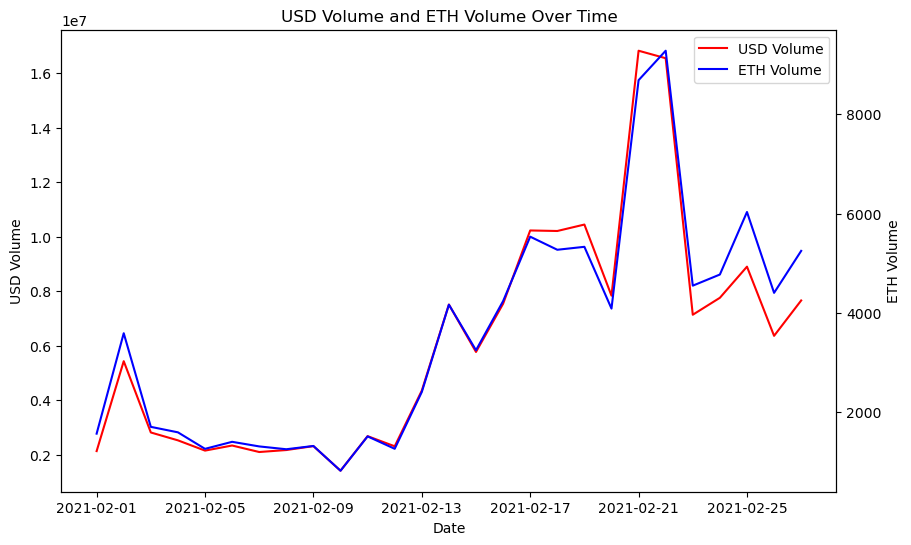

In [30]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10,6))

# Plot the line chart for 'USD_volume'
ax1.plot(daily_sales['event_dt'], daily_sales['USD_volume'], color='red', label='USD Volume')
ax1.set_ylabel('USD Volume')
ax1.set_xlabel('Date')

ax2 = ax1.twinx()

ax2.plot(daily_sales['event_dt'], daily_sales['ETH_volume'], color='blue', label='ETH Volume')
ax2.set_ylabel('ETH Volume')

plt.title('USD Volume and ETH Volume Over Time')
lines = ax1.get_lines() + ax2.get_lines()
ax1.legend(lines, [line.get_label() for line in lines])

plt.show()

Both NFT volumes in ETH and USD showed that 2021-02-10 is the best time to buy, as ETH-denominated and USD-denominated price volumes are the lowest in the month. As for when is the best time to sell, the ETH volume peaked on 2021-02-22, while the USD-denominated volume peaked a day earlier due to a higher ETH price. So depending on a trader's strategy, if he wants to hold ETH, he can choose to sell on 2021-02-22. If he wants to cash out in USD, he should sell a day earlier, on 2021-02-21 since the ETH price is higher.

### Is there an hour of the day effect?

In [31]:
hour_of_the_day_sales = df.groupby('event_hr')[['USD_volume', 'ETH_volume']].sum().reset_index()

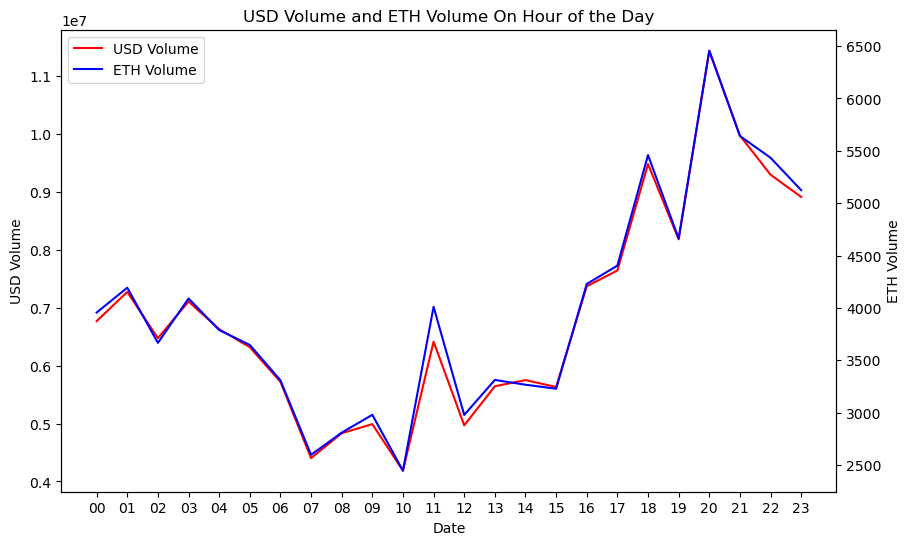

In [32]:
# let's examine whether there is hour of the day effect
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10,6))

ax1.plot(hour_of_the_day_sales['event_hr'], hour_of_the_day_sales['USD_volume'], color='red', label='USD Volume')
ax1.set_ylabel('USD Volume')
ax1.set_xlabel('Date')

ax2 = ax1.twinx()

ax2.plot(hour_of_the_day_sales['event_hr'], hour_of_the_day_sales['ETH_volume'], color='blue', label='ETH Volume')
ax2.set_ylabel('ETH Volume')

plt.title('USD Volume and ETH Volume On Hour of the Day')
lines = ax1.get_lines() + ax2.get_lines()
ax1.legend(lines, [line.get_label() for line in lines])

plt.show()

Seems like the volume peaked around 21p.m. and troughed at 10a.m.

### 2. How many assets gained in price vs. dropped in price during the time period? Were there any commonalities or patterns for these assets?

In [33]:
#1. find out the first purchase time and last purchase time of the asset
df_ = df.groupby(['asset_id']).agg(
    min_time=('event_time', 'min'),
    max_time=('event_time', 'max'),
).reset_index()

In [34]:
#2. find out the purchase price of each asset at the first purchase time, for simplicity, we will only examine on ETH term
df1 = df[['asset_id', 'event_time', 'ETH_volume']]
df_ = pd.merge(df_, df1, left_on=['asset_id', 'min_time'], right_on=['asset_id', 'event_time'], how='left')

In [35]:
df_.drop(columns='event_time', inplace=True)

In [36]:
df_.rename(columns={'event_total_price':'first_sales_price', 'ETH_volume':'first_sales_price_in_ETH'}, inplace=True)

In [37]:
df_ = pd.merge(df_, df1, left_on=['asset_id', 'max_time'], right_on=['asset_id', 'event_time'], how='left')

In [38]:
df_.rename(columns={'ETH_volume':'last_sales_price_in_ETH'}, inplace=True)

In [39]:
df_['price_delta'] = df_['last_sales_price_in_ETH'] - df_['first_sales_price_in_ETH']

In [40]:
df_price_increase = df_[df_['price_delta']>0][['asset_id', 'first_sales_price_in_ETH', 'last_sales_price_in_ETH', 'price_delta']] #for simplicity purpose, let's only look into price in eth

In [41]:
df_price_increase['asset_id'].nunique()
# number of NFTs gained in price during the period

7973

7973 NFTs has gained price during the period.

In [42]:
# now, add the features to the assets to see what commonalities does these asset have?
df_price_increase = df_price_increase.merge(df[['asset_id', 'asset_name', 'collection_name', 'asset_description','event_auction_type']])

In [43]:
df_price_increase = df_price_increase.groupby('collection_name')['price_delta'].sum().sort_values(ascending=False).reset_index()

In [44]:
df_price_increase['share_of_price_increase'] = round(df_price_increase['price_delta']/df_price_increase['price_delta'].sum(),2)

In [45]:
df_price_increase

,collection_name,price_delta,share_of_price_increase
0,CryptoPunks,9019.665632,0.50
1,Hashmasks,2405.655068,0.13
2,Rarible,1448.263690,0.08
3,Sorare,712.442058,0.04
4,Beeple: All Hail The King,417.247000,0.02
...,...,...,...
186,Cometh Spaceships,0.038000,0.00
187,FIEDLERS MIN,0.037800,0.00
188,Crypto stamp,0.021000,0.00
189,Unpop Culture,0.006300,0.00


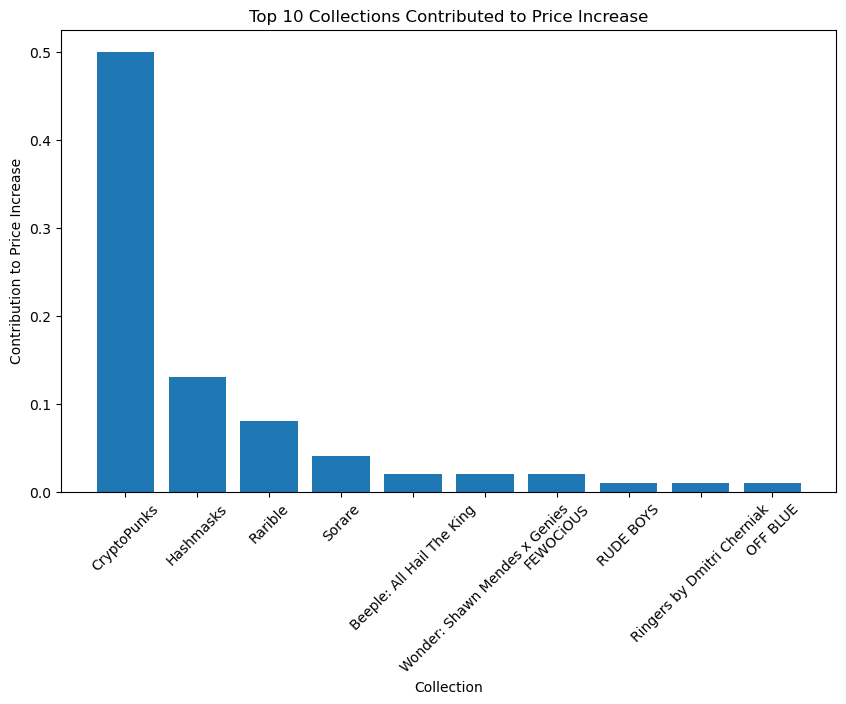

In [46]:
top_10_collections = df_price_increase['collection_name'].head(10)
top_10_shares = df_price_increase['share_of_price_increase'].head(10)

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(top_10_collections, top_10_shares)

ax.set_xlabel('Collection')
ax.set_ylabel('Contribution to Price Increase')
ax.set_title('Top 10 Collections Contributed to Price Increase')

plt.xticks(rotation=45)
plt.show()

CryptoPunk contributed about half of the total price increase during the period. Top 5 collections contributed about 80% of the total price increase during the period.

In [47]:
df_price_decrease = df_[df_['price_delta']<0][['asset_id', 'first_sales_price_in_ETH', 'last_sales_price_in_ETH', 'price_delta']] 

In [48]:
df_price_decrease['asset_id'].nunique()

1537

Compared to the number of NFTs that has gained price in ETH, the number of NFTs that has dropped in price is significantly less.

In [49]:
df_price_decrease = df_price_decrease.merge(df[['asset_id', 'asset_name', 'collection_name', 'asset_description','event_auction_type']])

In [50]:
df_price_decrease = df_price_decrease.groupby('collection_name')['price_delta'].sum().sort_values(ascending=True).reset_index()

In [51]:
df_price_decrease['share_of_price_decrease'] = round(df_price_decrease['price_delta']/df_price_decrease['price_delta'].sum(),2)

In [52]:
df_price_decrease

,collection_name,price_delta,share_of_price_decrease
0,ApeIn.Finance Shop,-1093.690000,0.31
1,Rarible,-903.982844,0.25
2,Hashmasks,-394.380029,0.11
3,RUDE BOYS,-337.746000,0.09
4,Twerky Club,-145.670000,0.04
...,...,...,...
82,Lost Relics,-0.016000,0.00
83,Mars,-0.012000,0.00
84,Meta Cards,-0.006600,0.00
85,Crypto card,-0.002000,0.00


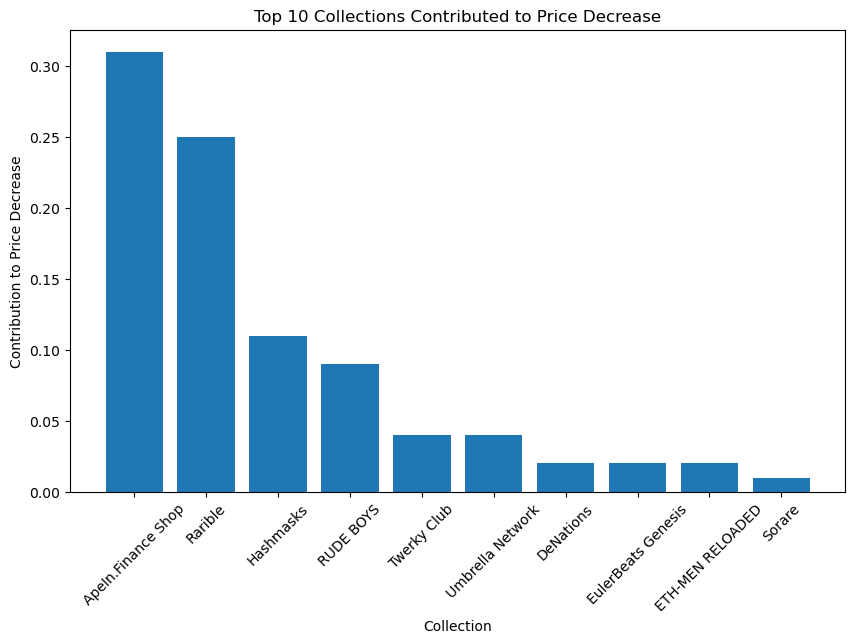

In [53]:
top_10_collections = df_price_decrease['collection_name'].head(10)
top_10_shares = df_price_decrease['share_of_price_decrease'].head(10)

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(top_10_collections, top_10_shares)

ax.set_xlabel('Collection')
ax.set_ylabel('Contribution to Price Decrease')
ax.set_title('Top 10 Collections Contributed to Price Decrease')

plt.xticks(rotation=45)
plt.show()

Top 2 collections (Apelin. Finance Shop, Rarible) contributed over half of the price drop during the period. Top 5 collections contributed 80% of the total price drop.

#### What if we factor in USD price?

In [54]:
df_ = df.groupby(['asset_id']).agg(
    min_time=('event_time', 'min'),
    max_time=('event_time', 'max'),
).reset_index()

df1 = df[['asset_id', 'event_time', 'USD_volume']]
df_ = pd.merge(df_, df1, left_on=['asset_id', 'min_time'], right_on=['asset_id', 'event_time'], how='left')

df_.drop(columns='event_time', inplace=True)
df_.rename(columns={'event_total_price':'first_sales_price', 'USD_volume':'first_sales_price_in_USD'}, inplace=True)
df_ = pd.merge(df_, df1, left_on=['asset_id', 'max_time'], right_on=['asset_id', 'event_time'], how='left')
df_.rename(columns={'USD_volume':'last_sales_price_in_USD'}, inplace=True)
df_['price_delta_in_USD'] = df_['last_sales_price_in_USD'] - df_['first_sales_price_in_USD']

In [56]:
df_price_increase_in_USD = df_[df_['price_delta_in_USD']>0][['asset_id', 'first_sales_price_in_USD', 'last_sales_price_in_USD', 'price_delta_in_USD']] 
df_price_increase_in_USD['asset_id'].nunique()

7982

Number of NFTs price increase in USD is greater than units in ETH.

In [57]:
df_price_decrease_in_USD = df_[df_['price_delta_in_USD']<0][['asset_id', 'first_sales_price_in_USD', 'last_sales_price_in_USD', 'price_delta_in_USD']] 
df_price_decrease_in_USD['asset_id'].nunique()

2319

Interestingly, there is also more NFTs price drop in USD terms, indicating that more of the items were bought at the higher ETH price range and sold at lower price range. 

### 3. Which collections were the most frequently traded? What was the average sale price for each collection?
Provide the average price in USD

In [58]:
df_collection = df.groupby('collection_name').agg({'event_id':'count', 'USD_volume': 'sum'}).reset_index().rename(columns={'event_id':'transaction_count'})

In [59]:
df_collection['average_price_in_USD'] = df_collection['USD_volume']/df_collection['transaction_count']

In [60]:
df_collection.sort_values('transaction_count', ascending=False, inplace=True)

In [61]:
df_collection

,collection_name,transaction_count,USD_volume,average_price_in_USD
960,Sorare,37543,8.488548e+06,226.102022
890,Rarible,9580,7.634024e+06,796.870987
567,Hashmasks,5603,2.352444e+07,4198.543095
95,Axie Infinity,5519,1.549345e+06,280.729344
313,CryptoKitties,4346,8.004497e+05,184.180782
...,...,...,...,...
451,Ekaitza NFTs,1,1.099143e+03,1099.142786
452,Electric Feel,1,3.253151e+02,325.315137
456,Elon Musk V3,1,3.925510e+02,392.550995
457,Emblem Vault [Ethereum],1,1.475704e+01,14.757037


<Figure size 1000x600 with 0 Axes>

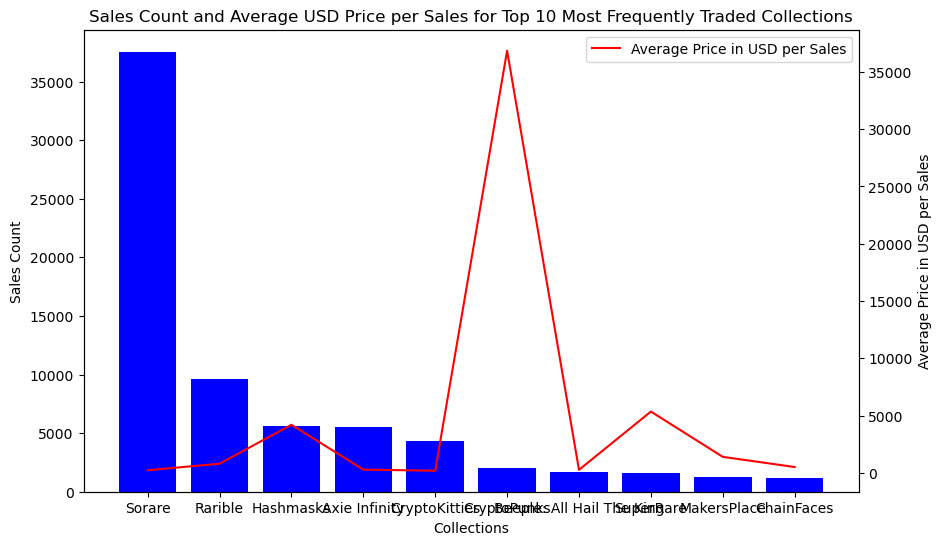

In [62]:
top_10_collections = df_collection['collection_name'].head(10)

# Filter the DataFrame to include only the top 10 collections
quantity = df_collection['transaction_count'].head(10)
average_price_USD = df_collection['average_price_in_USD'].head(10)

# Set the figure size
plt.figure(figsize=(10, 6))

fig, ax1 = plt.subplots(figsize=(10,6))

ax1.bar(top_10_collections, quantity, color='blue', label='Sales Count')
ax1.set_ylabel('Sales Count')
ax1.set_xlabel('Collections')

ax2 = ax1.twinx()

ax2.plot(top_10_collections, average_price_USD, color='red', label='Average Price in USD per Sales')
ax2.set_ylabel('Average Price in USD per Sales')

plt.title('Sales Count and Average USD Price per Sales for Top 10 Most Frequently Traded Collections')
lines = ax1.get_lines() + ax2.get_lines()
ax1.legend(lines, [line.get_label() for line in lines])

plt.show()

### 4. What impact did asset_description have on sale volume or pricing?

Let's first examine asset description on sales volume in ETH

In [63]:
df_description = df.groupby('asset_description')['ETH_volume'].sum().reset_index()

In [64]:
df_description.sort_values('ETH_volume', ascending=False, inplace=True)

In [65]:
df_description.head(100) # sort top 100 asset description by volume and create a world cloud

,asset_description,ETH_volume
10587,Rare Player Cards are only issued at 100 editi...,3825.320289
12410,The value of each Print is backed by ETH on a ...,1368.377200
11526,Super Rare Player Cards are only issued at 10 ...,1076.759176
3016,Autoglyphs are the first “on-chain” generative...,1052.817586
12449,There are an almost infinite number of ways to...,709.585588
...,...,...
11651,Thanks for all the love you have showed to my ...,49.462000
12666,This edition of video artworks is the result o...,48.168168
1995,A collectible,47.950000
8098,Legendary - Hiro the bold and boisterous prota...,46.990000


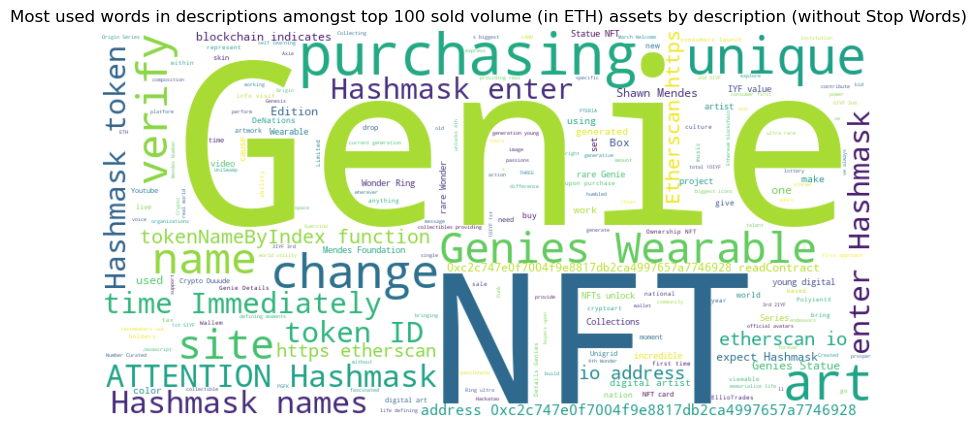

In [66]:
from wordcloud import WordCloud

text = ' '.join(df_description.head(100)['asset_description'].dropna())

# Remove stopwords from the text
stopwords = set(["the", "of", "an", "are", 'per', 'will', 'piece', 'collection'])  # Update the stop words 
clean_text = ' '.join([word for word in text.split() if word.lower() not in stopwords])

# Create a WordCloud object with desired configurations
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(clean_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most used words in descriptions amongst top 100 sold volume (in ETH) assets by description (without Stop Words)")
plt.show()

Popular words used in asset description amongst top 100 asset by (ETH) volume are descriptive words such as "Genie", "Wearable", "Unique", and call-for-action words such as "change", "purhasing", "time", "Immediately", "Attention" and etc.

#### Next, let's use the same method and examine how description has done to 100 top performing asset by price increase

In [77]:
#top 100 price increase NFTs
df_price_increase = df_[df_['price_delta_in_USD']>0][['asset_id', 'price_delta_in_USD']].merge(df, on='asset_id', how='left')
df_price_increase = df_price_increase.groupby('asset_description')['price_delta_in_USD'].sum().sort_values(ascending=False).reset_index()

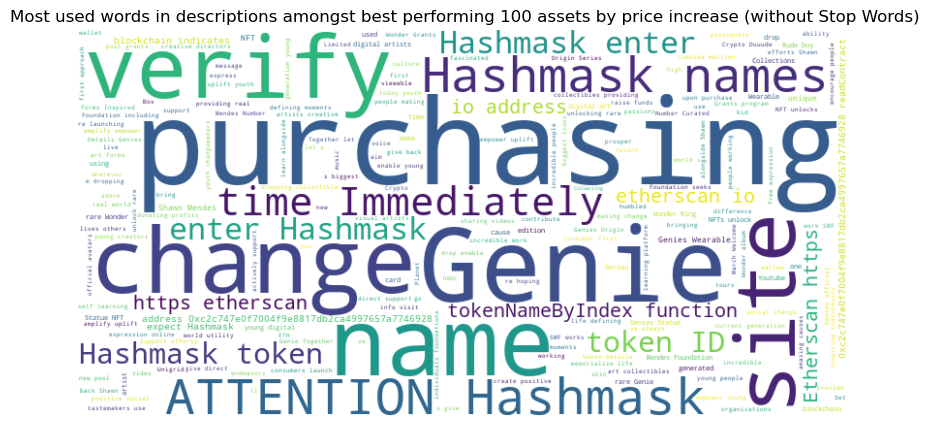

In [78]:
from wordcloud import WordCloud

text = ' '.join(df_price_increase.head(100)['asset_description'].dropna())

# Remove stopwords from the text
stopwords = set(["the", "of", "an", "are", 'per', 'will', 'piece', 'collection'])  # Update the stop words 
clean_text = ' '.join([word for word in text.split() if word.lower() not in stopwords])

# Create a WordCloud object with desired configurations
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(clean_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most used words in descriptions amongst best performing 100 assets by price increase (without Stop Words)")
plt.show()

Keywords are very similar amongst the top 100 assets by price increase.

### 5. How did asset_contract_date (creation date) relate to sales or pricing? Were older NFTs more valuable or popular?

In [81]:
df_contract_creation = df.groupby('asset_contract_date').agg({'event_id':'count', 'ETH_volume': 'sum'}).reset_index().rename(columns={'event_id':'transaction_count'})

In [82]:
df_contract_creation['asset_contract_date'] = pd.to_datetime(df_contract_creation['asset_contract_date'])

In [83]:
df_contract_creation['year'] = df_contract_creation['asset_contract_date'].dt.strftime('%Y')

In [84]:
df_contract_creation_by_yr = df_contract_creation.groupby('year')[['transaction_count', 'ETH_volume']].sum().reset_index()

In [85]:
df_contract_creation_by_yr['avg_price'] = df_contract_creation_by_yr['ETH_volume']/df_contract_creation_by_yr['transaction_count']

In [86]:
df_contract_creation_by_yr

,year,transaction_count,ETH_volume,avg_price
0,2018,13035,44613.635337,3.422603
1,2019,42219,12983.405568,0.307525
2,2020,24621,16189.855306,0.657563
3,2021,12842,21901.619388,1.705468


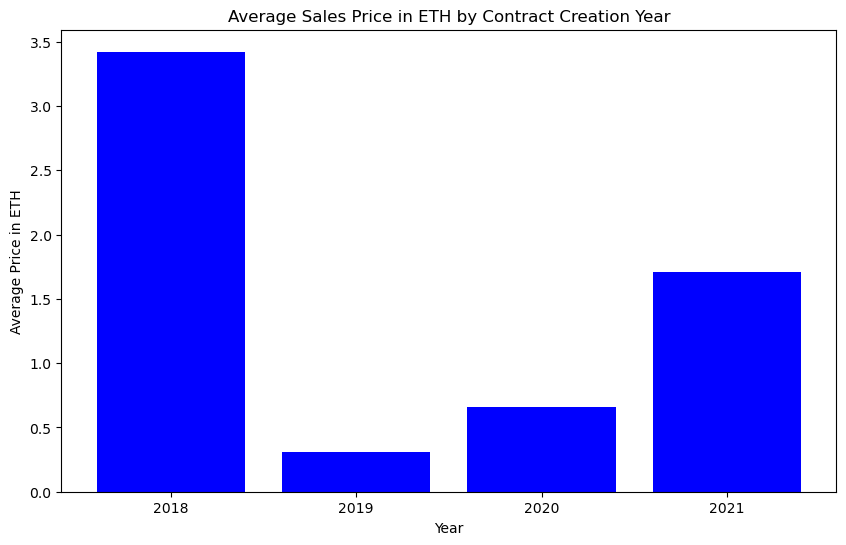

In [87]:
# first answer if the older NFT is more valuable or not?
plt.figure(figsize=(10, 6))
plt.bar(df_contract_creation_by_yr['year'], df_contract_creation_by_yr['avg_price'], color='blue')
plt.xlabel('Year')

plt.ylabel('Average Price in ETH')
plt.title('Average Sales Price in ETH by Contract Creation Year')
plt.show()

Average Price of NFT sales for the asset created in earlier years are more valuable than the NFTs created in more recent years. Therefore, the older NFT is more valuable than recent ones.

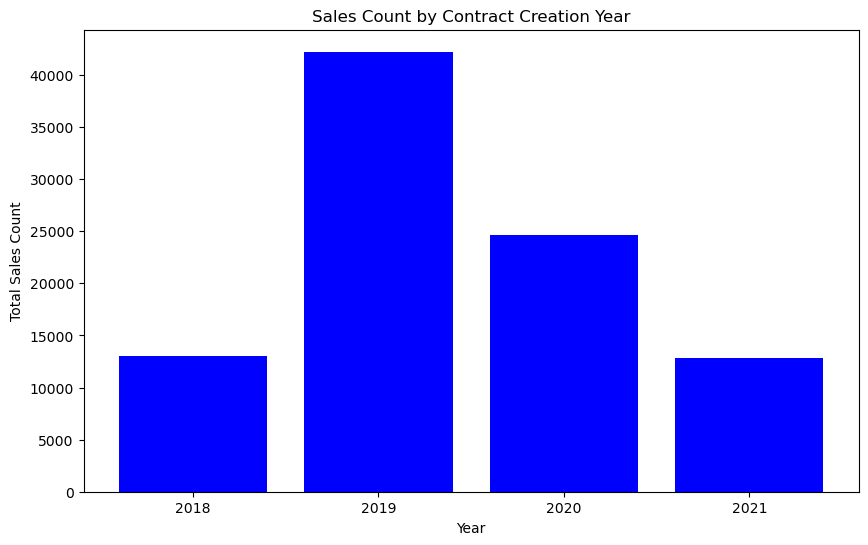

In [88]:
# first answer if the older NFT is more valuable or not?
plt.figure(figsize=(10, 6))
plt.bar(df_contract_creation_by_yr['year'], df_contract_creation_by_yr['transaction_count'], color='blue')
plt.xlabel('Year')

plt.ylabel('Total Sales Count')
plt.title('Sales Count by Contract Creation Year')
plt.show()

Older NFTs have fewer sales counts than recent years' NFTs. Note that 2021 only has two months of data, but it is already on par with the sales count for 2018. It is very likely to exceed the NFT contracts created in other years. Therefore, although older NFTs are more valuable, newer NFTs are more popular.